<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Walkthrough of Standard EDA Procedure

_Authors: Kiefer Katovich (SF)_

---

This lesson uses a boston housing market dataset to walk through a basic exploratory data analysis procedure, starting from the very beginning with loading the data. 

Though in many if not most cases the EDA procedure will be considerably more involved, this should give you an idea of the basic workflow a data scientist would go through when taking a look at a new dataset.

Note: this lesson is strictly exploratory. We will not be formulating any hypotheses about the data or testing them. In many cases you may have formulated a hypothesis before even looking at your data, which could considerably affect your focus and choices in what to investigate.


### Lesson Guide

- [Description of the Boston Housing Data](#data_description)
- [Loading the data](#load_data)
- [Initial examination](#header)
- [Drop unwanted columns](#drop)
- [Clean corrupted data](#clean)
- [Count null values and drop rows](#drop_nulls)
- [Rename columns](#rename)
- [Investigate potential outliers with boxplots](#boxplots)
- [Plot all variables together](#plot_all)
- [Standardization of variables](#standardization)
- [Plot the standardized variables together](#plot_all_rescaled)
- [Look at the covariance or correlation between variables](#cov_cor)


<a id='data_description'></a>

### Description of the Boston Housing Data columns

---

The columns of the dataset are coded. The corresponding descriptions are:

    CRIM: per capita crime rate by town 
    ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
    INDUS: proportion of non-retail business acres per town 
    CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
    NOX: nitric oxides concentration (parts per 10 million) 
    RM: average number of rooms per dwelling 
    AGE: proportion of owner-occupied units built prior to 1940 
    DIS: weighted distances to five Boston employment centres 
    RAD: index of accessibility to radial highways 
    TAX: full-value property-tax rate per 10000 dollars
    PTRATIO: pupil-teacher ratio by town 
    B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
    LSTAT: % lower status of the population 
    MEDV: Median value of owner-occupied homes in 1000's of dollars
    
Each row in the dataset represents a different suburb of Boston.

These descriptions of shortened or coded variables are often called "codebooks" or data dictionaries. They are typically found with datasets you might find online in a separate file.


**Load packages:**

In [3]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('darkgrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<a id='load_data'></a>

### 1. Load the data

---

Import the csv into a pandas DataFrame.

In [18]:
boston_file = '../datasets/housing.csv'

In [19]:
boston = pd.read_csv(boston_file)

<a id='header'></a>

### 2. Describe the basic format of the data and the columns

---

Use the `.head()` function (and optionally pass in an integer for the number of rows you want to see) to examine what the loaded data looks like. This is a good initial step to get a feel for what is in the csv and what problems may be present.

The `.dtypes` attribute tells you the data type for each of your columns.

In [20]:
# Print out the first 8 rows:
boston.head(8)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,"4,09",1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,"4,9671",2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,"4,9671",2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,"6,0622",3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,"6,0622",3,222,18.7,396.90,5.33,36.2
5,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,"6,0622",3,222,18.7,394.12,5.21,28.7
6,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,"5,5605",5,311,15.2,395.60,12.43,22.9
7,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,"5,9505",5,311,15.2,396.90,19.15,27.1


In [21]:
# Look at the dtypes of the columns:
boston.dtypes

Unnamed: 0      int64
CRIM          float64
ZN            float64
INDUS         float64
CHAS            int64
NOX           float64
RM            float64
AGE           float64
DIS            object
RAD            object
TAX             int64
PTRATIO       float64
B             float64
LSTAT         float64
MEDV          float64
dtype: object

<a id='drop'></a>

### 2. Drop unwanted columns

---

There is a column labeled `Unnamed: 0` which appears to simply number the rows. We already have the number id of the rows in the DataFrame's index and so we don't need this column.

The `.drop()` built-in function can be used to get rid of a column. When removing a column, we need to specify `axis=1` to the function.

For the record, the `.index` attribute holds the row indices. This is the the sister attribute to the `.columns` attribute that we work with more often.



In [22]:
# print out the index object and the first 20 items in the DataFrame's index 
# to see that we have these row numbers already:
#print boston.CRIM
type(boston.CRIM.values)
print boston.index
print boston.index.values[0:20]
print boston.shape

RangeIndex(start=0, stop=506, step=1)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
(506, 15)


In [23]:
# Remove the unneccesary column:
boston.drop('Unnamed: 0', axis=1, inplace=True)

In [24]:
boston.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,"4,09",1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,"4,9671",2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,"4,9671",2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,"6,0622",3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,"6,0622",3,222,18.7,396.90,5.33,36.2


<a id='clean'></a>

### 3. Clean corrupted columns

---

You may have noticed when we examined the `dtypes` attribute that two of the columns were of type "object", indicating that they were string. However, we know from the data description above (and we can infer from the header of the data) that `DIS` and `RAD` should in fact be numeric.

It is pretty common to have numeric columns represented as strings in your data if some of the observations are corrupted. It is important to always check the data types of your columns.

**3.A What is causing the `DIS` column to be encoded as a string? Figure out a way to make sure the column is numeric while preserving information.**

*Tip: The `.map()` built-in function on a column will apply a function to each element of the column.*

In [26]:
# The DIS column has commas in place of periods.
print boston.DIS[0:30].values

['4,09' '4,9671' '4,9671' '6,0622' '6,0622' '6,0622' '5,5605' '5,9505'
 '6,0821' '6,5921' '6,3467' '6,2267' '5,4509' '4,7075' '4,4619' '4,4986'
 '4,4986' '4,2579' '3,7965' '3,7965' '3,7979' '4,0123' '3,9769' '4,0952'
 '4,3996' '4,4546' '4,682' '4,4534' '4,4547' '4,239']


In [27]:
# Use the .map() function to change the commas to periods and convert back into floats:
boston.DIS = boston.DIS.map(lambda x: float(x.replace(',','.')))
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


**3.B What is causing the `RAD` column to be encoded as string? Figure out a way to make sure the column is numeric while preserving information.**

*Tip: You can put `np.nan` values in place of corrupted observations, which are numeric "Null" values.*

In [28]:
# Look at the unique values of RAD to see whats going on:
boston.RAD.unique()

array(['1', '2', '3', '5', '4', '?', '8', '6', '7', '24'], dtype=object)

In [29]:
# Looks like some of the rows have a '?' in place of a number. 
# Use the .map() function to replace the question marks with np.nan and convert the others
# to float values:
boston.RAD = boston.RAD.map(lambda x: np.nan if x == '?' else float(x))
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222,18.7,396.90,5.33,36.2


<a id='drop_nulls'></a>

### 4. Determine how many observations are missing

---

Having replaced the question marks with `np.nan` values, we know that there are some missing observations for the `RAD` column. 

When we start to build models with data, null values in observations are (almost) never allowed. It is important to always see how many observations are missing and for which columns.

A handy way to look at how many null values there are per column with pandas is:

```python
boston.isnull().sum()
```

The `.isull()` built-in function will convert the columns to boolean `True` and `False` values (returning a new dataframe) where null values are indicated by `True`. 

The `.sum()` function tacked on to the back of that will then sum these boolean columns, and the total number of null values per column will be returned.

In [30]:
boston.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD        40
TAX         0
PTRATIO     0
B           0
LSTAT       0
MEDV        0
dtype: int64

**Drop the null values.** 

In this case, lets keep it simple and just drop the rows from the dataset that contain null values. If a column has a ton of null values it often makes more sense to drop the column entirely instead of the rows with null values. In this case, we will just drop the rows.

The `.dropna()` function will drop any rows that have null values for you.

In [31]:
print boston.shape
boston.dropna(inplace=True)
print boston.shape

(506, 14)
(466, 14)


<a id='rename'></a>

### 5. Make the column names more descriptive

---

Often it is annoying to have to memorize what the codes mean for columns, or reference the codebook whenever I want to know the meaning of a variable. It often makes sense to rename columns that are not descriptive.

There is more than one way to do this, but one easy way is to use the `.rename()` function.

Here are the column names and their descriptions again for reference:

    CRIM: per capita crime rate by town 
    ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
    INDUS: proportion of non-retail business acres per town 
    CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
    NOX: nitric oxides concentration (parts per 10 million) 
    RM: average number of rooms per dwelling 
    AGE: proportion of owner-occupied units built prior to 1940 
    DIS: weighted distances to five Boston employment centres 
    RAD: index of accessibility to radial highways 
    TAX: full-value property-tax rate per 10000 dollars
    PTRATIO: pupil-teacher ratio by town 
    B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
    LSTAT: % lower status of the population 
    MEDV: Median value of owner-occupied homes in 1000's of dollars

In [33]:
boston.columns

Index([u'CRIM', u'ZN', u'INDUS', u'CHAS', u'NOX', u'RM', u'AGE', u'DIS',
       u'RAD', u'TAX', u'PTRATIO', u'B', u'LSTAT', u'MEDV'],
      dtype='object')

In [34]:
boston.rename(columns={
        'CRIM':'rate_of_crime',
        'ZN':'residential_zone_pct',
        'INDUS':'business_zone_pct',
        'CHAS':'borders_river',
        'NOX':'oxide_concentration',
        'RM':'average_rooms',
        'AGE':'owner_occup_pct',
        'DIS':'dist_to_work',
        'RAD':'access_to_highway',
        'TAX':'property_tax',
        'PTRATIO':'student_teacher_ratio',
        'B':'black_stat',
        'LSTAT':'pct_underclass',
        'MEDV':'home_median_value'
    }, inplace=True)

In [35]:
boston.head(3)

,rate_of_crime,residential_zone_pct,business_zone_pct,borders_river,oxide_concentration,average_rooms,owner_occup_pct,dist_to_work,access_to_highway,property_tax,student_teacher_ratio,black_stat,pct_underclass,home_median_value
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242,17.8,392.83,4.03,34.7


<a id='describe'></a>

### 6. Describe the summary statistics for the columns

---

The `.describe()` function gives summary statistics for each of your variables. What are some, if any, oddities you notice about the variables based on this output?

In [36]:
boston.describe()

,rate_of_crime,residential_zone_pct,business_zone_pct,borders_river,oxide_concentration,average_rooms,owner_occup_pct,dist_to_work,access_to_highway,property_tax,student_teacher_ratio,black_stat,pct_underclass,home_median_value
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000
mean,3.326334,11.154506,11.144292,0.075107,0.555840,6.272489,68.504506,3.811963,9.611588,410.049356,18.462876,358.207897,12.650129,22.484120
std,7.095767,22.731621,6.820913,0.263848,0.116818,0.696995,28.023878,2.123668,8.735627,168.921219,2.167158,88.884020,7.068120,9.017586
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,6.000000,1.129600,1.000000,187.000000,12.600000,2.520000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.450000,5.884250,45.450000,2.101425,4.000000,280.250000,17.400000,375.912500,7.125000,16.800000
50%,0.256355,0.000000,9.690000,0.000000,0.538000,6.189000,77.150000,3.207450,5.000000,330.000000,19.050000,391.705000,11.300000,21.200000
75%,3.689387,12.500000,18.100000,0.000000,0.624000,6.618750,93.975000,5.213925,24.000000,666.000000,20.200000,396.397500,16.955000,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


There are some potential outliers in variables here:

1. black_stat has at least one outlier at the min end of the range.
2. owner_occup_pct has at least one outlier at the min end.
3. business_zone_pct might have an outlier at the min end.
4. rate_of_crime has at least one outlier at the max end.

<a id='boxplots'></a>

### 7. Plot variables with potential outliers using boxplots.

---

Here we will use the seaborn package to plot boxplots of the variables we have identified as potentially having outliers.

Some notes on seaborn's boxplot keyword argument options:

    orient: can be 'v' or 'h' for vertical and horizontal, respectively
    fliersize: the size of the outlier points (pixels I think)
    linewidth: the width of line outlining the boxplot
    notch: show the confidence interval for the median (calculated by seaborn/plt.boxplot)
    saturation: saturate the colors to an extent

There are more keyword arguments available but those are most relevant for now.
    

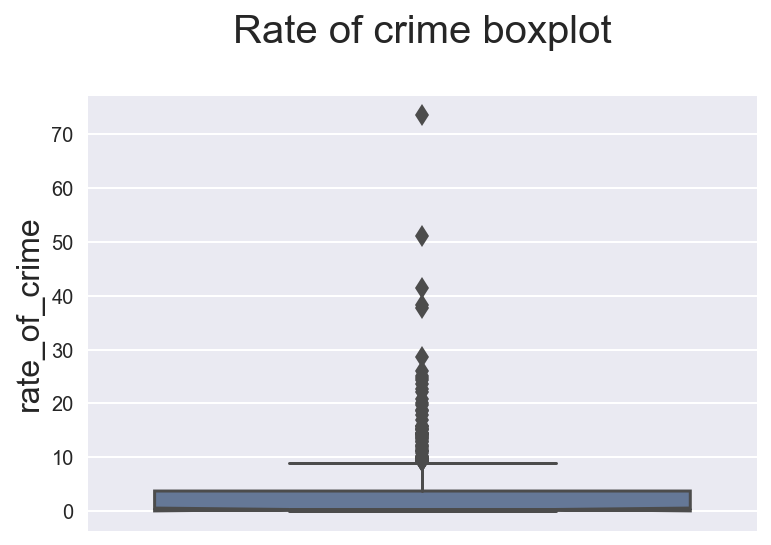

In [37]:
# rate of crime
fig = plt.figure(figsize=(6,4))
ax = fig.gca()

ax = sns.boxplot(boston.rate_of_crime, orient='v',
                fliersize=8, linewidth=1.5, notch=True,
                saturation=0.5, ax=ax)

ax.set_ylabel('rate_of_crime', fontsize=16)
ax.set_title('Rate of crime boxplot\n', fontsize=20)

plt.show()

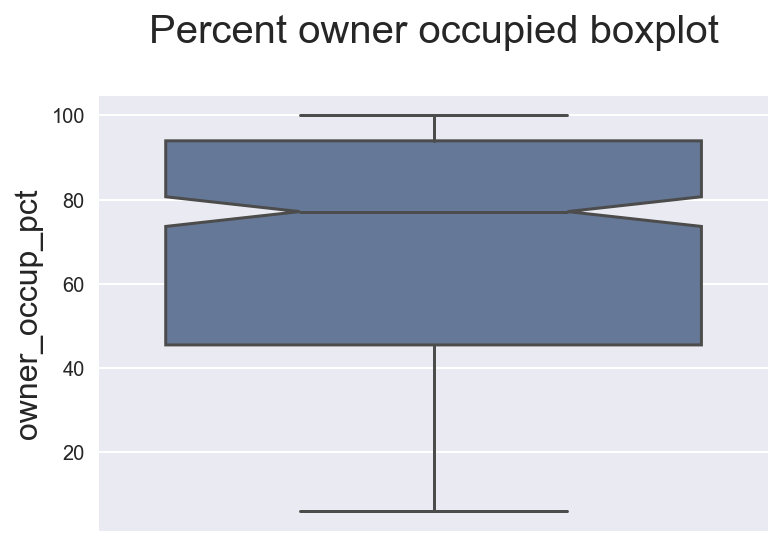

In [38]:
# percent owner occupied
fig = plt.figure(figsize=(6,4))
ax = fig.gca()

ax = sns.boxplot(boston.owner_occup_pct, orient='v',
                fliersize=8, linewidth=1.5, notch=True,
                saturation=0.5, ax=ax)

ax.set_ylabel('owner_occup_pct', fontsize=16)
ax.set_title('Percent owner occupied boxplot\n', fontsize=20)

plt.show()

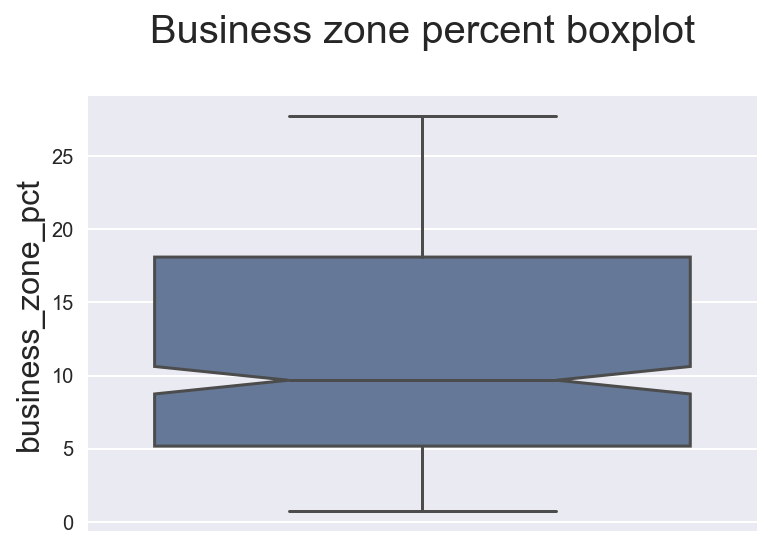

In [39]:
# business zone percent
fig = plt.figure(figsize=(6,4))
ax = fig.gca()

ax = sns.boxplot(boston.business_zone_pct, orient='v',
                fliersize=8, linewidth=1.5, notch=True,
                saturation=0.5, ax=ax)

ax.set_ylabel('business_zone_pct', fontsize=16)
ax.set_title('Business zone percent boxplot\n', fontsize=20)

plt.show()

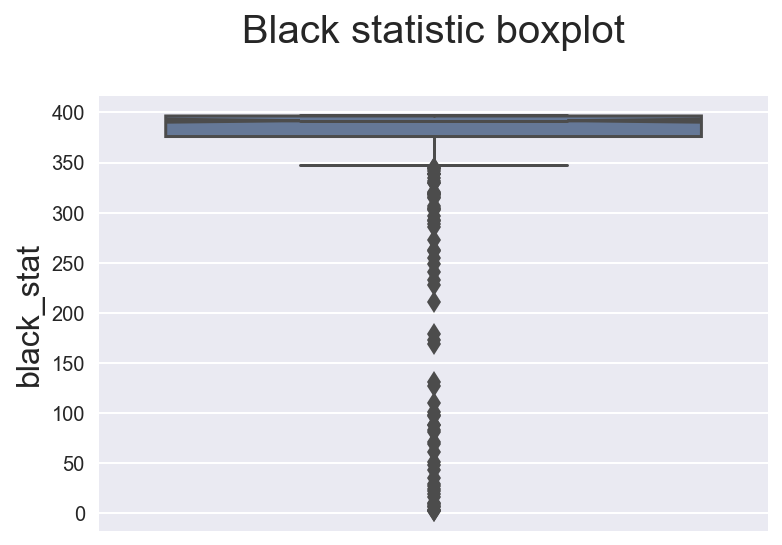

In [40]:
# black population statistic
fig = plt.figure(figsize=(6,4))
ax = fig.gca()

ax = sns.boxplot(boston.black_stat, orient='v',
                fliersize=8, linewidth=1.5, notch=True,
                saturation=0.5, ax=ax)

ax.set_ylabel('black_stat', fontsize=16)
ax.set_title('Black statistic boxplot\n', fontsize=20)

plt.show()

From the boxplots, it looks like rate of crime and the proportion black people statistic have real outliers. The other seem alright.

<a id='plot_all'></a>

### 8. Plot all the variables on boxplots together.

---

Plot all the variables using using a horizontal boxplot with seaborn. What is wrong with this plot, if anything?

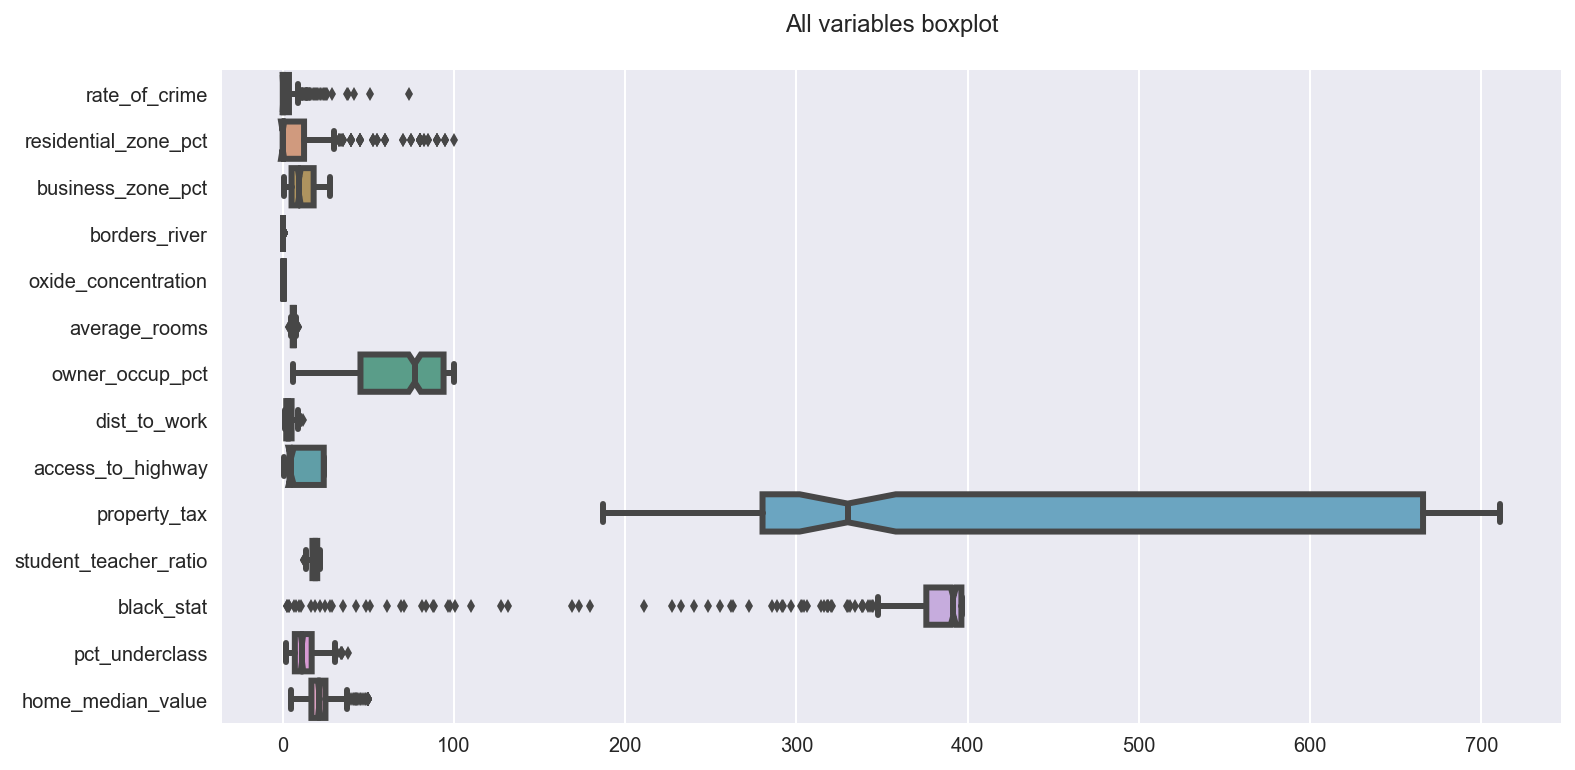

In [41]:
fig = plt.figure(figsize=(12,6))
ax = fig.gca()

ax = sns.boxplot(data=boston, orient='h', fliersize=5, linewidth=3, notch=True,
                 saturation=0.5, ax=ax)

ax.set_title('All variables boxplot\n')
plt.show()

In [42]:
# The boxplots are hard to visualize since all of these variables are on different scales.


<a id='standardization'></a>

### 9. Standardizing variables

---

Rescaling variables is very common, and sometimes essential. For example, when we get to regularization of models the rescaling procedure becomes a requirement before fitting the model.

Here we'll rescale the variables using a procedure called "standardization", which forces the distribution of each variable to have a mean of 0 and a standard deviation of 1.

Standardization is not complicated:

    standardized_variable = (variable - mean_of_variable) / std_dev_of_variable
    
Note: Nothing else is changed about the distribution of the variable. It doesn't become normally distributed.

**9.A Pull out rate of crime and plot the distribution.**

Also print out the mean and standard deviation of the original variable.

In [43]:
roc = boston.rate_of_crime.values
roc_mean = np.mean(roc)
roc_std = np.std(roc)
print roc_mean, roc_std

3.32633433476 7.08814909896


**9.B Standardize the rate_of_crime variable. Notice the new mean is centered at 0.**

In [44]:
roc_norm = (roc - roc_mean) / roc_std
print np.mean(roc_norm), np.std(roc_norm)

6.09907927691e-17 1.0


**9.C Plot the original and standardized rate of crime. Notice that nothing changes about the distribution except for the location and the scale.**

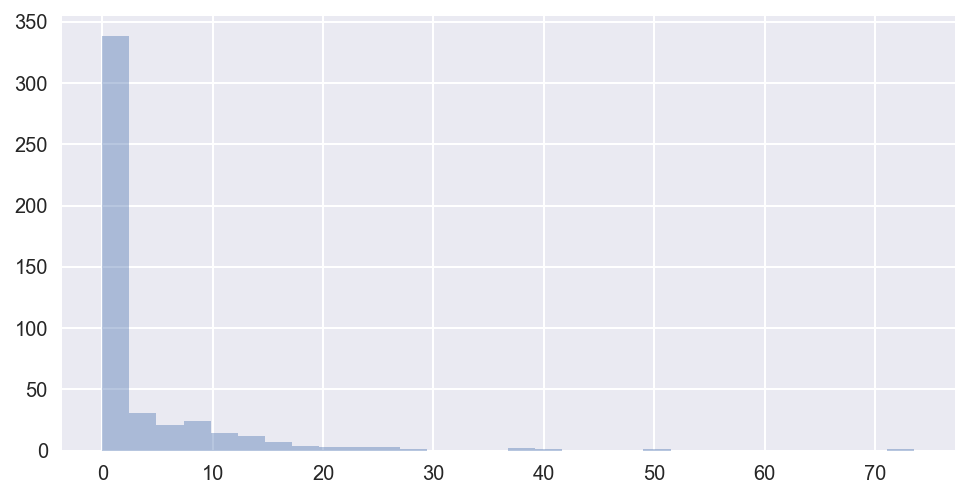

In [45]:
fig = plt.figure(figsize=(8,4))
ax = fig.gca()

ax = sns.distplot(roc, bins=30, kde=False)
plt.show()

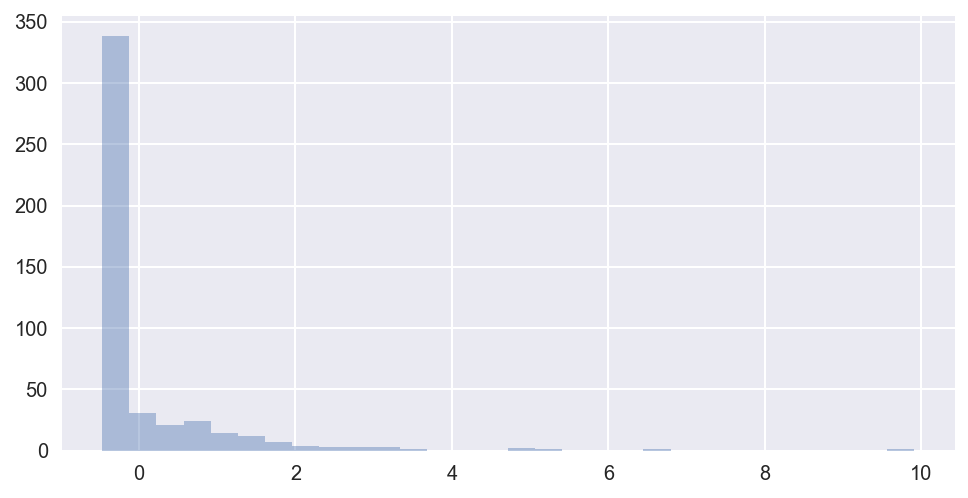

In [46]:
fig = plt.figure(figsize=(8,4))
ax = fig.gca()

ax = sns.distplot(roc_norm, bins=30, kde=False)
plt.show()


<a id='plot_all_rescaled'></a>

### 10. Standardize all of the columns and re-create the boxplot

---

Pandas DataFrames make it extremely easy to standardize the columns all at once. You can standardize the data like so:

```python
boston_norm = (boston - boston.mean()) / boston.std()
```

Create a standardized version of the data and recreate the boxplot. Now you can better examine the differences in the shape of distributions across our variables.

In [47]:
boston_norm = (boston - boston.mean()) / boston.std()

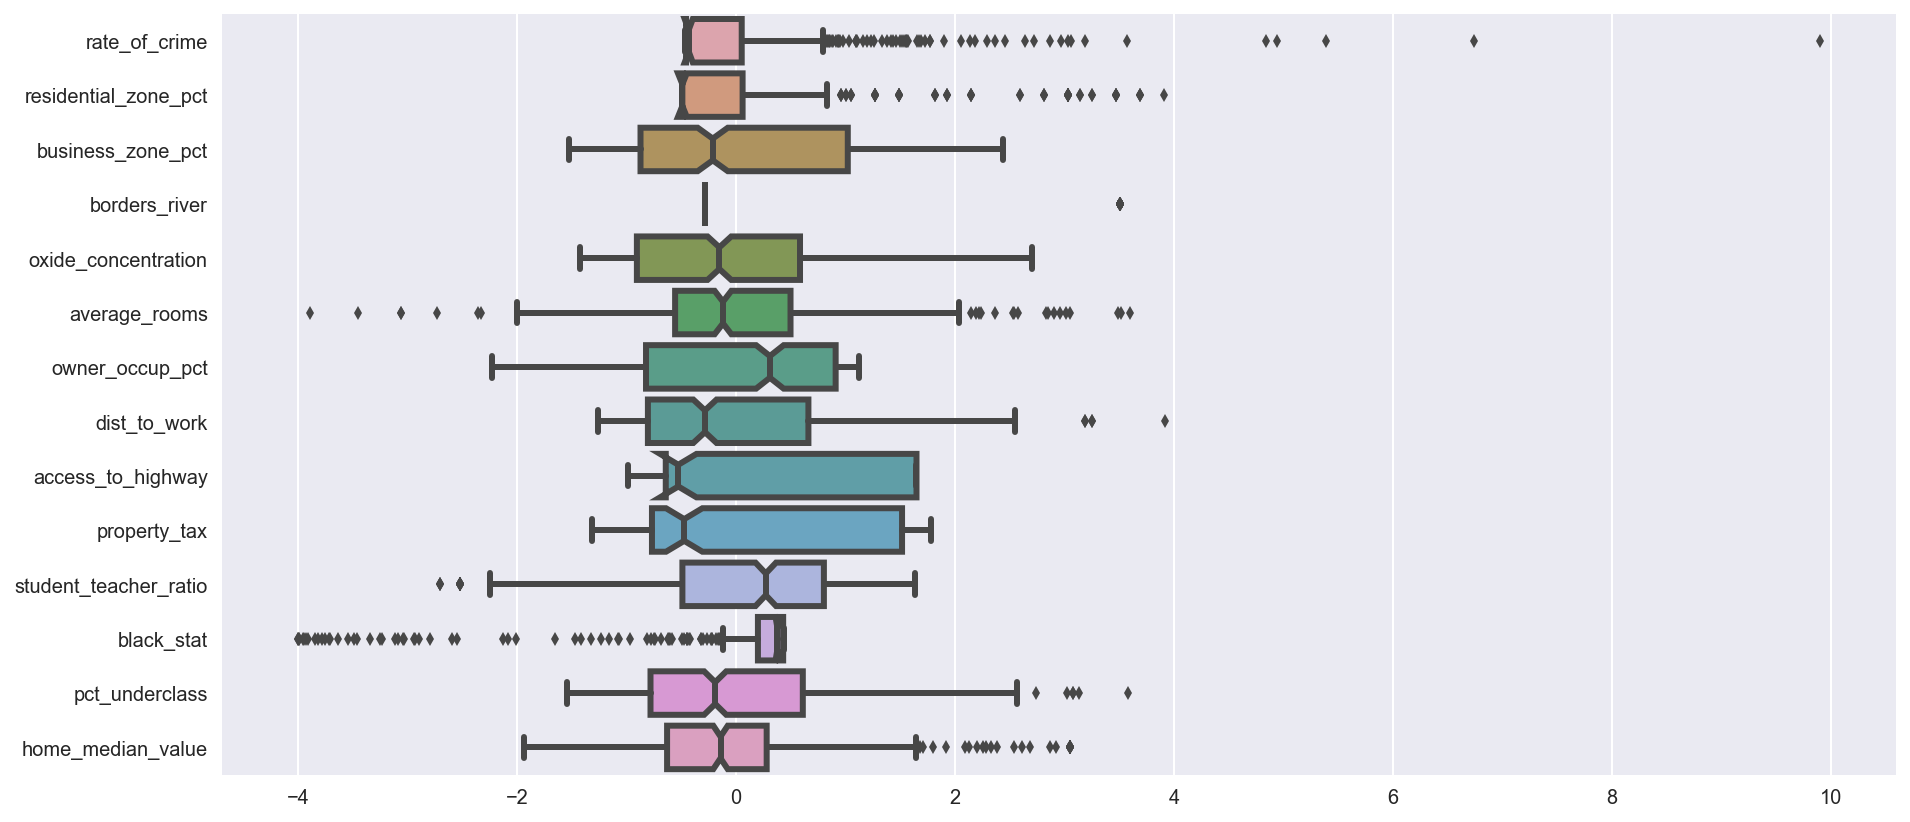

In [48]:
fig = plt.figure(figsize=(15, 7))
ax = fig.gca()

ax = sns.boxplot(data=boston_norm, orient='h', fliersize=5, 
                 linewidth=3, notch=True, saturation=0.5, ax=ax)
plt.show()


<a id='cov_cor'></a>

### 11. Covariance and correlation matrices

---

A great way to easily get a feel for linear relationships between your variables is with a correlation matrix.

Below is the formula for the covariance between two variables $X$ and $Y$:

#### 11.A Covariance

Given sample size $N$ variables $X$ and $Y$, with means $\bar{X}$ and $\bar{Y}$:

### $$ \text{covariance}(X, Y) = \sum_{i=1}^N \frac{(X - \bar{X})(Y - \bar{Y})}{N}$$

The covariance is a measure of "relatedness" between variables. It is literally the sum of deviations from the mean of $X$ times deviations from the mean of $Y$ adjusted by the sample size $N$.

Code the covariance between `pct_underclass` and `home_median_value` below by hand. Verify that you got the correct result using `np.cov()`. Set the keyword argument `bias=True` in `np.cov()` to have it use the same covariance calculation.

Note: `np.cov` returns a covariance _matrix_, which will be each values covariance with itself and the other variable in matrix format.

In [49]:
pct_under = boston.pct_underclass.values
med_val = boston.home_median_value.values

under_val_cov = np.sum((pct_under - np.mean(pct_under))*(med_val - np.mean(med_val)))/len(pct_under)
print under_val_cov
print np.cov(pct_under, med_val, bias=True)

-46.6635580412
[[ 49.85110814 -46.66355804]
 [-46.66355804  81.14236586]]


#### 11.B Correlation

Covariance is not very interpretable. The values are difficult to read because they are relative to the variance of the variables.

A much more common metric, and one directly calculable from the covariance, is the correlation.

Again, let $X$ and $Y$ be our two variables, with covariance $cov(X, Y)$ that we calculated above:

### $$ \text{pearson correlation}\;r = cor(X, Y) =\frac{cov(X, Y)}{std(X)std(Y)}$$

Calculate the correlation between `pct_under` and `med_value` by hand below. Check that it is the same as `np.corrcoef()` with `bias=True`:


In [50]:
uv_corr = under_val_cov / (np.std(pct_under) * np.std(med_val))
print uv_corr
print np.corrcoef(pct_under, med_val, bias=True)

-0.733696772641
[[ 1.         -0.73369677]
 [-0.73369677  1.        ]]


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: bias and ddof have no effect and are deprecated
  app.launch_new_instance()


#### 11.C The correlation matrix

We can see the correlation between all the numeric variables in our dataset by using pandas DataFrame's built in `.corr()` function. Use it below on the boston dataset.

It is very useful to get a feel for what is related and what is not, which can help you decide what is worth investigating further (though with a lot of variables, the matrix can be a bit overwhelming...)

In [51]:
boston.corr()

,rate_of_crime,residential_zone_pct,business_zone_pct,borders_river,oxide_concentration,average_rooms,owner_occup_pct,dist_to_work,access_to_highway,property_tax,student_teacher_ratio,black_stat,pct_underclass,home_median_value
rate_of_crime,1.000000,-0.224533,0.453573,-0.059286,0.454794,-0.259346,0.385813,-0.413295,0.686361,0.638655,0.318062,-0.459357,0.488930,-0.402687
residential_zone_pct,-0.224533,1.000000,-0.534804,-0.043174,-0.511765,0.312325,-0.564412,0.669798,-0.317120,-0.313394,-0.386644,0.176412,-0.414598,0.357747
business_zone_pct,0.453573,-0.534804,1.000000,0.065866,0.760027,-0.404952,0.635092,-0.707574,0.605772,0.738231,0.387690,-0.350904,0.611393,-0.490163
borders_river,-0.059286,-0.043174,0.065866,1.000000,0.091785,0.101140,0.091571,-0.105081,-0.009709,-0.040180,-0.127876,0.047467,-0.056845,0.188416
oxide_concentration,0.454794,-0.511765,0.760027,0.091785,1.000000,-0.305690,0.728478,-0.765810,0.598606,0.656462,0.163856,-0.365326,0.590495,-0.420656
average_rooms,-0.259346,0.312325,-0.404952,0.101140,-0.305690,1.000000,-0.238659,0.217564,-0.214301,-0.298968,-0.355091,0.133237,-0.615721,0.690857
owner_occup_pct,0.385813,-0.564412,0.635092,0.091571,0.728478,-0.238659,1.000000,-0.743785,0.452948,0.505761,0.247303,-0.264797,0.599298,-0.374378
dist_to_work,-0.413295,0.669798,-0.707574,-0.105081,-0.765810,0.217564,-0.743785,1.000000,-0.492243,-0.534064,-0.215449,0.287883,-0.504725,0.250866
access_to_highway,0.686361,-0.317120,0.605772,-0.009709,0.598606,-0.214301,0.452948,-0.492243,1.000000,0.908304,0.468876,-0.424444,0.480370,-0.370843
property_tax,0.638655,-0.313394,0.738231,-0.040180,0.656462,-0.298968,0.505761,-0.534064,0.908304,1.000000,0.465972,-0.424072,0.543232,-0.462720
